# 📝 Exercise M5.02

The aim of this exercise is to find out whether a **decision tree
model** is able to **extrapolate**.

By extrapolation, we refer to values predicted by a model **outside of the
range of feature values seen during the training**.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, **create two models**, a **linear regression model** and a **decision tree
regression model**, and **fit them** on the training data. Limit the depth to
3 levels for the decision tree.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model1 = LinearRegression()
model1.fit(data_train, target_train)

model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

**Create a test dataset**, ranging from the minimum to the maximum of the
flipper length of the training dataset. Get the **predictions of both models**
using this test dataset.

In [7]:
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                         data_train[data_columns[0]].max()),
                         columns=data_columns)

pred1 = model1.predict(data_test)
pred2 = model2.predict(data_test)

**Create a scatter plot** with the **training samples** and the
**predictions** of both models.

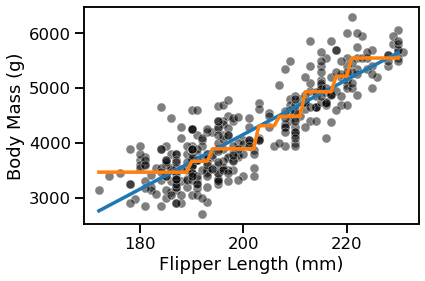

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data_train, x=data_columns[0], y=target_train, color='black', alpha=0.5)
plt.plot(data_test, pred1)
plt.plot(data_test, pred2)

Now, we will check the **extrapolation capabilities** of both models. Create a
test dataset containing the values of your previous dataset. Besides, add values
below and above the minimum and the maximum of the flipper length seen
during training.

In [37]:
data_test2 = pd.DataFrame(np.arange(data_train[data_columns[0]].min()-20,
                          data_train[data_columns[0]].max()+20),
                          columns=data_columns)

Finally, **make predictions** with both models on this new test set. Repeat
the plotting of the previous exercise.

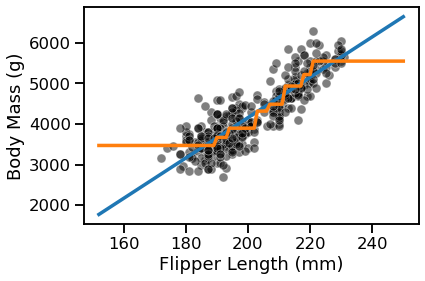

In [38]:
pred1 = model1.predict(data_test2)
pred2 = model2.predict(data_test2)

sns.scatterplot(data=data_train, x=data_columns[0], y=target_train, color='black', alpha=0.5)
plt.plot(data_test2, pred1)
plt.plot(data_test2, pred2)